# Word2vec 문장분류 실습

단어 임베딩 방법론 가운데 하나인 Word2Vec을 활용해서 문장을 분류하는 방법에 대해 이야기해보려고 합니다. 우선은 대한예수교장로회총회에서 제공하는 소요리문답을 분석해 보려고 하는데요. 어떤 일을 하려고 하는지 한번 예를 들어보죠.
> 문답02	하나님께서 무슨 규칙을 우리에게 주시어 어떻게 자기를 영화롭게 하고 즐거워할 것을 지시하셨는가?

> 문답18  사람이 타락한 지위에서 죄되는 것이 무엇인가?

문답02는 하나님에 대한 이야기를 하는것 같습니다. 문답18은 사람 또는 죄에 대한 것이구요. 이렇게 문답이 하나 주어졌을 때 해당 문답이 어느 부류에 속하는지 알아맞혀 보고 싶은 겁니다. 다시 말해 문답을 ‘하나님’, ‘사람’, ‘그리스도’등과 같은 범주로 분류(classification)하는 문제에 대한 것입니다. 물론 사람이 문답을 하나하나 읽어보면서 확인해도 되지만 여기서는 컴퓨터의 힘을 빌려보려고 합니다.

## 먼저 소요리문답자료를 크롤링합니다.

### 소요리문답 목록 페이지에서 문답별 파라미터 수집(POST방식 Query)
1. 다음을 반복한다.
    1. 소요리문답 목록 페이지에 접근한다.
    1. 소요리문답 목록 없음 페이지면 반복을 중지한다.
    1. 개별 소요리문답의 POST방식 Query 파라미터를 추출한다.
    1. 페이지 번호를 1 증가한다.

### 개별 게시물 수집
1. 다음을 반복한다.
    1. 개별 소요리문답의 POST방식 Query 파라미터를 이용하여 개별 소요리문답 페이지에 접근한다.
    1. 소요리문답 번호을 추출한다.
    1. 소요리문답 질문을 추출한다.
    1. 소요리문답 답문을 추출한다.
    1. 다음 POST방식 Query 파라미터로 넘어간다.
    
### JSON파일로 저장한다.

In [1]:
pageNo=1
data = {'pno': "{}".format(pageNo)} 
data
url = "http://www.gapck.org/sub_06/sub03_01.asp"
post_arg = (url, data)
post_arg
post_params1 = []
post_param1 = ['11', '97', '2', '1']
post_param2 = ['12', '96', '2', '1']
post_param3 = ['13', '95', '2', '1']
post_params1 = [post_param1,post_param2]
post_params1.append(post_param3)
post_params1


[['11', '97', '2', '1'], ['12', '96', '2', '1'], ['13', '95', '2', '1']]

In [2]:
import requests
from bs4 import BeautifulSoup

# 목표 url : 대한예수교장로회총회->총회헌법->소요리문답
url = "http://www.gapck.org/sub_06/sub03_01.asp"
# 웹 서버에 POST방식 요청 보내고 응답 받기
#thisfrm.hno.value = no; 문답번호
#thisfrm.rno.value = num; 문답번호 역순
#thisfrm.pno.value = pno; 페이지번호
pageNo=12
post_param = {'pno': "{}".format(pageNo)} 
resp = requests.post(url, data=post_param)
resp.encoding=None   # None 으로 설정
print("페이지요청결과상태 : [{}]".format(resp.status_code))

# 전송된 HTML 문서 얻기
html = resp.text
# HTML 문서를 DOM으로 변환하기
soup = BeautifulSoup(html, "lxml")
#print("페이지요청결과텍스트 : [{}]".format(soup.getText()))
if "허용되지 않은 접근입니다" in soup.getText():
    print("페이지 없음")
    
# 목표 HTML 요소 선택
elem1 = soup.find_all("a", {"class": "b_color_03"})
#elem2 = soup.find_all("td", {"class": "color-title7_brown"})
# 목표 텍스트 추출
#print(elem1)
#print(elem2)

import re

for elem_text in elem1:
    print(elem_text)
    print(elem_text.text)
    print(elem_text.attrs['href'])
    # 소요리문답에 대해 질문과 답이 있는 페이지를 POST방식으로 Query할수있는 Param획득
    print(re.findall("(\d+)",elem_text.attrs['href']))
    

페이지요청결과상태 : [200]
페이지 없음


In [3]:
import requests
from bs4 import BeautifulSoup

# 목표 url
url = "http://www.gapck.org/sub_06/sub03_02.asp"
# 웹 서버에 POST방식 요청 보내고 응답 받기
#thisfrm.hno.value = no; 문답번호
#thisfrm.rno.value = num; 문답번호 역순
#thisfrm.pno.value = pno; 페이지번호
params = ['18', '90', '2', '1']
qnaNo = params[0]
reversQnaNo = params[1]
pageNo = params[2]

post_param = {'hno': "{}".format(qnaNo), 'rno': "{}".format(reversQnaNo), 'pno': "{}".format(pageNo)} 

resp = requests.post(url, data=post_param)
resp.encoding=None   # None 으로 설정
# 전송된 HTML 문서 얻기
html = resp.text
# HTML 문서를 DOM으로 변환하기
soup = BeautifulSoup(html, "lxml")
# 목표 HTML 요소 선택
elem0 = soup.find("td", {"class": "G0_654400"})
elem1 = soup.find("a", {"class": "b_color_03"})
elem2 = soup.find("td", {"class": "color-title7_brown"})
# 목표 텍스트 추출
print(elem0)
print(elem0.text)
print(elem1)
print(elem1.text)
print(elem2)
print(elem2.text)

#for elem_text in elem:
#    print(elem_text)
#    print(elem_text.text)
#text = elem.get_text()
#print(text)


<td class="G0_654400" valign="top" width="0%">18</td>
18
<a class="b_color_03" href="#">사람이 타락한 지위에서 죄되는 것이 무엇인가?</a>
사람이 타락한 지위에서 죄되는 것이 무엇인가?
<td class="color-title7_brown" valign="top" width="0%">사람이 타락한 지위에서 죄되는 것은 아담의 첫 범죄에 유죄한 것과 근본 의가 없는 것과 온 성품이 부패한 것인데 이것은 보통으로 원죄라 하는 것이요, 아울러 원죄로 말미암아 나오는 모든 죄다.<br/>(롬 5:12, 18∼19, 고전 15:22, 롬 5:6, 엡 2:1∼3, 롬 8:7∼8, 창 6:5, 약 1:14∼15, 마  15:19)</td>
사람이 타락한 지위에서 죄되는 것은 아담의 첫 범죄에 유죄한 것과 근본 의가 없는 것과 온 성품이 부패한 것인데 이것은 보통으로 원죄라 하는 것이요, 아울러 원죄로 말미암아 나오는 모든 죄다.(롬 5:12, 18∼19, 고전 15:22, 롬 5:6, 엡 2:1∼3, 롬 8:7∼8, 창 6:5, 약 1:14∼15, 마  15:19)


In [4]:
import requests
from bs4 import BeautifulSoup
import ujson
import time
import re

"""
소요리문답 목록 페이지에서 문답별 파라미터 수집(POST방식 Query)
1. 다음을 반복한다.
    1. 소요리문답 목록 페이지에 접근한다.
    2. 소요리문답 목록 없음 페이지면 반복을 중지한다.
    3. 개별 소요리문답의 POST방식 Query 파라미터를 추출한다.
    4. 페이지 번호를 1 증가한다.

개별 소요리문답 수집
2. 다음을 반복한다.
    1. 개별 소요리문답의 POST방식 Query 파라미터를 이용하여 개별 소요리문답 페이지에 접근한다.
    2. 소요리문답 번호을 추출한다.
    3. 소요리문답 질문을 추출한다.
    4. 소요리문답 답문을 추출한다.
    5. 다음 POST방식 Query 파라미터로 넘어간다.
"""

# 소요리문답 목록 페이지에서 문답별 파라미터 수집(POST방식 Query)
def collect_post_urls():
    """목록 페이지에서 개별 소요리문답의 POST방식 Query 파라미터를 수집하여 돌려준다."""
    
    all_post_urls = []
    page_num = 1
    
    while True:
        #print("소요리문답의 목록 페이지 {}에 접근합니다.".format(page_num))
        list_page = get_list_page(page_num)
        
        if is_empty_page(list_page):
            break
            
        post_urls = extract_post_urls(list_page)
        for post_url in post_urls:
            all_post_urls.append(post_url)
        page_num += 1
        
    print("총 {}개의 소요리문답의 POST방식 Query 파라미터가 수집되었습니다.".format(len(all_post_urls)))
        
    return all_post_urls

        
def get_list_page(page_num):
    """주어진 페이지 번호에 해당하는 소요리문답 목록 페이지에 접근하여 soup 객체를 만들어 돌려준다."""
    
    list_page_url = gen_list_page_url()
    post_param = {'pno': "{}".format(page_num)} 
    soup = get_soup(list_page_url,post_param)
    
    return soup


def get_soup(url,post_params):   
    """주어진 POST방식 Query 파라미터로 접속하여 HTML을 얻어서 soup 객체를 만들어 돌려준다."""
    
    #resp = requests.get(url)
    resp = requests.post(url, data=post_params)
    resp.encoding=None   # None 으로 설정
    html = resp.text
    soup = BeautifulSoup(html, "lxml")
    time.sleep(1.5)    
    
    return soup


def gen_list_page_url():
    """소요리문답 목록 페이지 URL을 돌려준다."""
    
    # 목표 url : 대한예수교장로회총회->총회헌법->소요리문답
    list_page_url = "http://www.gapck.org/sub_06/sub03_01.asp"
    
    return list_page_url
    
    
def is_empty_page(list_page):
    """주어진 페이지가 빈 페이지인지 여부를 판단한다."""
    
    if "허용되지 않은 접근입니다" in list_page.get_text():
        return True
    
    return False

    
def extract_post_urls(list_page):
    """주어진 페이지에서 개별 소요리문답의 POST방식 Query 파라미터를 추출한다."""

    post_url_elems = list_page.find_all("a", {"class": "b_color_03"})
    
    post_urls = []
    for post_url_elem in post_url_elems:
        post_url = re.findall("(\d+)",post_url_elem.attrs['href'])
        post_urls.append(post_url)
    
    
    return post_urls

# 개별 소요리문답 수집
def collect_posts(output_file_name, all_post_urls):
    """주어진 소요리문답 POST방식 Query 파라미터들에 접근하여 소요리문답을 수집하여 출력 파일에 저장한다."""
    
    # 목표 개별 소요리문답 url
    url = "http://www.gapck.org/sub_06/sub03_02.asp"

    num_post_urls = len(all_post_urls)
    
    with open(output_file_name, "w", encoding="utf-8") as output_file:
        for i, post_url in enumerate(all_post_urls, 1):
            #print("소요리문답 POST방식 Query 파라미터 {}에 접근합니다. ({}/{})".format(post_url, i, num_post_urls))
            
            #params = ['18', '90', '2', '1']
            qnaNo = post_url[0]
            reversQnaNo = post_url[1]
            pageNo = post_url[2]

            post_param = {'hno': "{}".format(qnaNo), 'rno': "{}".format(reversQnaNo), 'pno': "{}".format(pageNo)} 
            
            post_page = get_soup(url,post_param)
            catechism_no = extract_no(post_page)
            catechism_question = extract_question(post_page)
            catechism_answer = extract_answer(post_page)
            write_post(output_file, catechism_no, catechism_question, catechism_answer)
            # break

            
def extract_no(post_page):
    """주어진 soup 객체에서 소요리문답 번호을 추출하여 돌려준다."""

    catechism_elem = post_page.find("td", {"class": "G0_654400"})
    catechism_no = catechism_elem.text
    
    return catechism_no
            
    
def extract_question(post_page):
    """주어진 soup 객체로부터 소요리문답 질문을 추출하여 돌려준다."""
    
    question_elem = post_page.find("a", {"class": "b_color_03"})
    question = question_elem.text.strip()
    
    return question 


def extract_answer(post_page):
    """주어진 soup 객체에서 게시물 본문을 추출하여 돌려준다."""
    
    # 본문의 CSS 선택자를 정규표현을 이용하여 지정한다.
    answer_elem = post_page.find("td", {"class": "color-title7_brown"})
    answer = answer_elem.text.strip()     
    
    return answer


def write_post(output_file, catechism_no, catechism_question, catechism_answer):
    """주어진 게시물 요소를 JSON 문자열로 만들어 출력 파일에 기록한다."""
    
    post = {"no": catechism_no, "question": catechism_question, "answer": catechism_answer}
    print(ujson.dumps(post, ensure_ascii=False), file=output_file)
    
    
def main():
    """소요리문답자료를 수집하여 저장한다."""
    
    output_file_name = "bible-crawl/catechism.txt"
    all_post_urls = collect_post_urls()
    collect_posts(output_file_name, all_post_urls)
    print("총 {}개의 소요리문답 자료를 저장하였습니다.".format(len(all_post_urls)))
    
    
main()

총 107개의 소요리문답의 POST방식 Query 파라미터가 수집되었습니다.
총 107개의 소요리문답 자료를 저장하였습니다.


## 크롤링한 소요리문답자료를 형태소분석한다.

### 크롤링한 소요리문답 JSON파일을 읽어서 문장단위로 나누어 형태소 분석을 한다.
1. 소요리문답 JSON파일을 읽는다.
1. 질문과 답변을 문장단위로 나누어 형태소 분석을 한다.
1. 형태소 분석 결과를 후처리 한다.
1. 형태소 분석 결과를 파일로 저장한다.
    
### 형태소 분석 결과를 다시 JSON파일로 저장한다.

In [5]:
from konlpy.tag import Komoran
from konlpy.tag import Hannanum
import itertools
import mmap
from tqdm import tqdm_notebook
import ujson
import re

def split_sentences(text):
    """주어진 텍스트를 문장 단위로 분절하여 돌려준다."""
    
    all_sentences = []
    lines = [line for line in text.strip().splitlines() if line.strip]
    
    for line in lines:
        sentences = re.split("(?<=[.?!]) ", line)
        all_sentences += sentences
    
    return all_sentences


def get_morph_anal(analyzer, text):
    """주어진 형태소 분석기 객체로 텍스트를 문장 단위로 형태소 분석하여 돌려준다."""
    
    sent_morph_anals = []
    sentences = split_sentences(text)
    
    for sentence in sentences:
        sent_morph_anal = analyzer.pos(sentence)
        sent_morph_anals.append(sent_morph_anal)
        
    return sent_morph_anals

def find_sublists(seq, sublist):
    length = len(sublist)
    for index, value in enumerate(seq):
        if value == sublist[0] and seq[index:index+length] == sublist:
            yield index, index+length
            

def replace_sublist(seq, target, replacement, maxreplace=None):
    sublists = find_sublists(seq, target)
    if maxreplace:
        sublists = itertools.islice(sublists, maxreplace)
    for start, end in sublists:
        seq[start:end] = replacement


def get_num_lines(file_path):
    """빠른 속도로 텍스트 파일의 줄 수를 세어 돌려준다.
    https://blog.nelsonliu.me/2016/07/29/progress-bars-for-python-file-reading-with-tqdm/
    """
    
    fp = open(file_path, "r+")
    buf = mmap.mmap(fp.fileno(), 0)
    lines = 0
    while buf.readline():
        lines += 1
    return lines

def refine_answer(answer):
    """소요리문답의 성경구절이 있는 부분을 형태소분석을 위해 제거"""
    
    #print("소스:{}".format(answer))
    find_str = "(" 
    str_index = answer.find(find_str)
    if str_index > -1:
        answer_desc = answer[:str_index]
    else:
        answer_desc = answer
        
    refined_answer = answer_desc.translate({ ord('「'): '',ord('」'): ' ' })
        
    return refined_answer
    
def parse_row(row):
    """주어진 행을 열 단위로 분절하여 돌려준다."""

    qna_no = row["no"]
    question_source = row["question"]
    answer_source = row["answer"]
    
    return qna_no, question_source, answer_source


def compose_json_doc(qna_no, question_source, answer_source, refine_answer, question_ma, answer_ma):
    """주어진 문서 요소들로 JSON 문서를 생성하여 돌려준다."""
    
    json_doc = {
        "no": int(qna_no), 
        "question": question_source, 
        "answer": answer_source, 
        "refine_answer": refine_answer, 
        "question_ma": question_ma, 
        "answer_ma": answer_ma              
    }   
        
    return json_doc


def write_json_doc(output_file, json_doc):
    """주어진 JSON 문서를 출력 파일에 기록한다."""
        
    json_str = ujson.dumps(json_doc, ensure_ascii=False)
    print(json_str, file=output_file)

#=============================================================#
# 부분 리스트 치환에 의한 형태소 분석 결과 후처리
post_proc_pairs = [
    ([('신', 'XPN'), ('구약 성경', 'NNP')], [('신구약', 'NNG'), ('성경', 'NNG')]),
    ([('제', 'XPN'), ('일', 'NNB'), ('계명', 'NNG')], [('제 일 계명', 'NNG')]),
    ([('제', 'XPN'), ('이', 'MM'), ('계명', 'NNG')], [('제 이 계명', 'NNG')]),
    ([('제', 'XPN'), ('삼', 'NR'), ('계명', 'NNG')], [('제 삼 계명', 'NNG')]),
    ([('제', 'XPN'), ('사', 'NNG'), ('계명', 'NNG')], [('제 사 계명', 'NNG')]),
    ([('제', 'XPN'), ('오', 'NR'), ('계명', 'NNG')], [('제 오 계명', 'NNG')]),
    ([('제', 'XPN'), ('육', 'NR'), ('계명', 'NNG')], [('제 육 계명', 'NNG')]),
    ([('제', 'XPN'), ('치', 'VV'), ('ㄹ', 'ETM'), ('계명', 'NNG')], [('제 칠 계명', 'NNG')]),
    ([('제', 'XPN'), ('팔', 'VV'), ('ㄹ', 'ETM'), ('계명', 'NNG')], [('제 팔 계명', 'NNG')]),
    ([('제', 'XPN'), ('구', 'NNG'), ('계명', 'NNG')], [('제 구 계명', 'NNG')]),
    ([('제', 'XPN'), ('십', 'NR'), ('계명', 'NNG')], [('제 십 계명', 'NNG')]),
    ([('첫','MM'), ('말씀','NNG')], [('첫','NR'),('말씀','NNG')]),
    ([('첫','MM'), ('기도','NNG')], [('첫','NR'),('기도','NNG')])
]


input_file_name = "bible-crawl/catechism.txt"
output_file_name = "bible-crawl/catechism.ma.txt"
komoran = Komoran()
hannanum = Hannanum()


with open(input_file_name, "r", encoding="utf-8") as input_file, \
        open(output_file_name, "w", encoding="utf-8") as output_file:
        
    for line in tqdm_notebook(input_file, desc="Reading documents", 
                                  total=get_num_lines(input_file_name)):
        
        doc_row = ujson.loads(line)
        qna_no, question_source, answer_source = parse_row(doc_row)
        refined_answer = refine_answer(answer_source)        

        #print("질문[{}]:{}".format(qna_no, question_source.translate({ ord('「'): '',ord('」'): ' ' })))
        #print("답변:{}".format(refined_answer))
        
        question_ma = get_morph_anal(komoran, question_source.translate({ ord('「'): '',ord('」'): ' ' }) )
        # 소요리 문답 질문에 대한 부분 리스트 치환에 의한 형태소 분석 결과 후처리
        for src, dst in post_proc_pairs:
            replace_sublist(question_ma[0], src, dst)

        answer_ma = get_morph_anal(komoran, refined_answer)
        # 소요리 문답 답변에 대한 부분 리스트 치환에 의한 형태소 분석 결과 후처리
        for src, dst in post_proc_pairs:
            replace_sublist(answer_ma[0], src, dst)

        #print("질문[{}]:{}".format(qna_no, question_ma))
        #print("답변:{}".format(answer_ma))
        #print("{}".format("="*80))
        json_doc = compose_json_doc(qna_no, question_source, answer_source, refined_answer, question_ma, answer_ma)
        write_json_doc(output_file, json_doc)



C:\Users\saint\ChatBot\chat_env\lib\site-packages\ipykernel_launcher.py:136: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


## 소요리문답 조건부 형태소 빈도 계수
### 빈도 계수 결과의 다중 키 정렬
소요리 문답 형태소 분석 결괴를 sorted() 함수를 연속적으로 사용하여 (빈도 역순 + 어휘 정순 + 품사 정순)의 다중 키 정렬을 수행한다.

In [6]:
"""
소요리 문답의 주요 품사 형태소 빈도를 계수하여 다중 키로 정렬하여 출력한다.
"""

from collections import Counter
from operator import itemgetter
import mmap
from tqdm import tqdm_notebook
import ujson

MA_KEY1 = "question_ma"
MA_KEY2 = "answer_ma"

MAJOR_POSES = ["NNG", "NNP", "NP", "XR", "VV", "VA", "MAG", "MAJ"]
PRED_POSES = ["VV", "VA"]


def get_num_lines(file_path):
    """빠른 속도로 텍스트 파일의 줄 수를 세어 돌려준다.
    https://blog.nelsonliu.me/2016/07/29/progress-bars-for-python-file-reading-with-tqdm/
    """
    
    fp = open(file_path, "r+")
    buf = mmap.mmap(fp.fileno(), 0)
    lines = 0
    while buf.readline():
        lines += 1
    return lines


def filter_morph_anal(morph_anals):
    """주어진 형태소 분석 결과 리스트에서 필요한 형태소만 골라서 돌려준다."""
    
    morph_anals = [(lex, pos) for lex, pos in morph_anals if is_major_pos(pos)]
    
    return morph_anals


def is_major_pos(pos):
    """주어진 품사의 주요 품사 여부를 판단하여 돌려준다."""
    
    if pos in MAJOR_POSES:
        return True
    
    return False


def is_pred_pos(pos):
    """주어진 품사가 용언 품사인지를 판단하여 돌려준다."""
    
    if pos in PRED_POSES:
        return True
    
    return False


def main():
    """소요리 문답의 주요 품사 형태소 빈도를 계수하여 다중 키로 정렬하여 출력한다."""
    
    morph_counter = Counter()
    input_file_name = "data/catechism/catechism.ma.txt"

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in tqdm_notebook(input_file, desc="Reading documents", 
                                  total=get_num_lines(input_file_name)):
            doc = ujson.loads(line)
            #print("[{}]+\n+[{}]".format(doc[MA_KEY1],doc[MA_KEY2]))
            doc_row = doc[MA_KEY1]+doc[MA_KEY2]            
            for sent_ma in doc_row:
                sent_ma = filter_morph_anal(sent_ma)
                morph_counter.update(sent_ma)
                
    morph_counts = [(l, p, c) for (l, p), c in morph_counter.items()]
    sorted_morph_counts = sorted(morph_counts, key=itemgetter(1))
    sorted_morph_counts = sorted(sorted_morph_counts, key=itemgetter(0))
    sorted_morph_counts = sorted(sorted_morph_counts, key=itemgetter(2), reverse=True)
                
    for lex, pos, count in sorted_morph_counts:
        if is_pred_pos(pos):
            lex += "다"
            
        print("{}\t{}\t{}".format(lex, pos, count))

#
# 실행
#
main()

C:\Users\saint\ChatBot\chat_env\lib\site-packages\ipykernel_launcher.py:65: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


ValueError: too many values to unpack (expected 2)

### 소요리 문답 워드크라우드 그리기
소요리 문답 형태소 분석 결과에서 일반명사(NNG), 고유명사(NNP), 어근(XR)을 대상으로 워드크라우드 그리기를 수행한다.

Reading documents: 100%|██████████████████████████████████████████████████████████| 107/107 [00:00<00:00, 11882.51it/s]


소요리문답


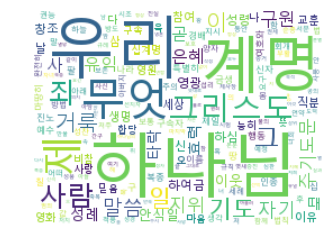

In [6]:
# 워드 클라우드 그리기

import sys
from collections import defaultdict
from collections import Counter
import ujson
import wordcloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import mmap

FEATURE_POSES = ["NNG", "NNP", "NP", "MAG", "XR"]
MA_KEY1 = "question_ma"
MA_KEY2 = "answer_ma"
PRES_KEY = "president"
NUM_WORDS = 200


def read_president_documents(input_file_name):
    """형태소 분석된 소요리 문답 JSON 파일을 읽어서 돌려준다."""
    
    president_documents = defaultdict(list)

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in tqdm(input_file, desc="Reading documents", 
                         total=get_num_lines(input_file_name)):
            json_obj = ujson.loads(line)
            #president = json_obj[PRES_KEY]
            president = "소요리문답"
            doc_row = json_obj[MA_KEY1]+json_obj[MA_KEY2]
            morphs = []

            for sent_anal in doc_row:
                for morph_lex, morph_cat in sent_anal:
                    if morph_cat not in FEATURE_POSES:
                        continue
                        
                    morphs.append(morph_lex)
                    
            president_documents[president].extend(morphs)
            
    presidents = []
    documents = []
    
    for president, document in president_documents.items():
        presidents.append(president)
        documents.append(" ".join(document))
            
    return presidents, documents


def get_num_lines(file_path):
    """빠른 속도로 텍스트 파일의 줄 수를 세어 돌려준다.
    https://blog.nelsonliu.me/2016/07/29/progress-bars-for-python-file-reading-with-tqdm/
    """
    
    fp = open(file_path, "r+")
    buf = mmap.mmap(fp.fileno(), 0)
    lines = 0
    while buf.readline():
        lines += 1
    return lines


def read_mask(mask_file_name):
    """주어진 이름의 파일에서 마스킹 이미지 데이터를 읽어서 돌려준다."""
    
    mask = np.array(Image.open(mask_file_name))
    
    return mask
    

def get_word_counts(documents):
    """Get word counts for given documents."""
    
    word_counts = [Counter(document.split()) for document in documents]
    
    return word_counts


def draw_word_clouds(presidents, word_counts, mask):
    """전직 대통령별 연설문의 워드 클라우드를 그린다."""
    
    font_path = get_font_path()
    
    for president, word_count in zip(presidents, word_counts):
        cloud = build_cloud(word_count, font_path, mask)
        show_cloud(president, cloud, mask)
    

def get_font_path():
    """플랫폼에 따라 글꼴 경로를 설정한다."""

    if sys.platform == "win32" or sys.platform == "win64":
        font_path = "C:/Windows/Fonts/malgun.ttf"
    elif sys.platform == "darwin":
        font_path = "/Library/Fonts/AppleGothic.ttf"
        
    return font_path


def build_cloud(word_counts, font_path, mask):
    """주어진 어휘 계수 결과와 글꼴 경로를 이용하여 워드 클라우드를 생성하여 돌려준다."""


    cloud_gen = wordcloud.WordCloud(background_color="white",
                                    font_path=font_path, max_words=NUM_WORDS,
                                    mask=mask, collocations=False)
    cloud = cloud_gen.generate_from_frequencies(word_counts)

    return cloud


def show_cloud(president, cloud, mask):
    """워드 클라우드를 화면에 표시한다."""
    
    print(president)
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()   
    
    
def main():
    """소요리 문답을 워드 클라우드로 시각화한다."""
    
    input_file_name = "data/catechism/catechism.ma.txt"
    mask_file_name = "data/catechism/bible.png"
    presidents, documents = read_president_documents(input_file_name)
    mask = read_mask(mask_file_name)
    word_counts = get_word_counts(documents)
    draw_word_clouds(presidents, word_counts, mask)

#  
# 실행
#

main()

## 단순 어휘 빈도에 근거한 키워드 추출
키워드를 특정 문헌의 내용을 요약적으로 표현하는 형태소의 집합이라고 정의할 때에 가장 먼저 시도할 수 있는 키워드 추출 방법은 형태소 빈도에 의한 방법이다.
즉, 특정 문헌에서 많이 나타나는 형태소가 그 문헌의 내용을 나타낼 가능성이 높다는 가정을 하는 것이다.

다음 스크립트는 문헌별 단순 어휘 빈도에 근거한 문헌별 키워드 추출을 수행한다.

>문헌별 단순 어휘 빈도를 문헌 정보학에서는 용어로 용어 빈도(term frequency)라 부른다.

일반명사(NNG), 고유명사(NNP), 어근(XR) 형태소를 추출한 뒤 이들의 용어 빈도를 측정한 다음 상위 10개만 키워드로 추출한다. 

## 용어 빈도 역문헌 빈도에 근거한 키워드 추출
위에서 보인 용어 빈도에 근거한 키워드 추출 결과는 제법 유용하다. 
하지만 어떤 키워드들은 해당 논문의 내용을 나타낸다고 할 수는 있지만 너무 흔하게 쓰이는 용어여서 해당 논문만의 특징적인 내용을 나타내기에는 부적합할 수도 있다. 
즉, 용어 빈도에 근거해 추출한 키워드들 가운데에는 특정성(specificity)이 부족한 것들이 있다.
특정성이 높은 용어들의 특징은 상대적으로 드물게 쓰인다는 것이다.
다른 말로 하면, 넓게 쓰이지 않는다고 할 수 있으며, 결국 어떤 용어가 하나의 문헌에서도 많이 사용되고 그 문헌이 속한 전체 문헌 집합에 속한 다수의 다른 문헌들에서 널리 쓰였다면 이 용어는 특정성이 떨어지는 용어이다.
이 때 특정 용어가 사용된 문헌의 수를 문헌 빈도(DF: document frequency)라고 부르며, 이의 역에 해당하는 역문헌 빈도(IDF: inverse document frequency)도 정의할 수 있다. 
수식으로는 다음과 같이 표현할 수 있다.

$$
    \operatorname{idf}(t, D) = \log\frac{|D|}{|\{d \in D: t \in d\}|}
$$

* $|D|$: 전체 문헌 집합 $D$의 크기, 곧 전체 문헌의 수
* $|\{d \in D: t \in d\}|$: 용어 $t$가 포함된 문헌의 수

위의 수식의 의미는 주어진 용어 $t$와 전체 문헌 집합 $D$에 대한 역문헌 빈도는 전체 문헌의 수를 주어진 용어가 출현한 문헌들의 수, 즉 문헌 빈도로 나눈 값에 로그를 취한 값으로 정의한다는 것이다.
주어진 용어 $t$가 출현한 문서의 수가 많으면 많을수록 역문헌 빈도의 값이 작아지며, 그러한 문서의 수가 적으면 적을수록 역문헌 빈도의 값이 커진다.
즉, 특정성이 커진다.
나누기 연산을 통해 얻어진 값에 로그를 취하여 스케일링을 하면 값이 평탄화가 이루어진다.
한편, 어떤 용어의 문헌 빈도가 0일 경우에 대해서도 역문헌 빈도를 정의해야 할 수 있기 때문에 실제로는 다음과 같이 최소 문헌 빈도를 1로 설정한 값이 많이 사용된다.

$$
    \operatorname{idf}(t, D) = \log\frac{|D|}{|\{d \in D: t \in d\}|+1}
$$

실제 자료 처리에 있어서는 용어 빈도도 다음과 같이 평탄화하여 사용한다.

$$
    \operatorname{tf}(t, d) = \log(\operatorname{tf}(t, d)+1)
$$

TFIDF를 구하는 위의 과정을 앞서 용어 빈도에 근거한 키워드 추출 스크립트에 추가하여 구현한 스크립트의 소스는 다음과 같다.
추출한 키워드는 다수의 문헌이 포함된 문헌 집합 내에서 특정 문헌을 향한 특정성, 즉 역문헌 빈도를 이용하여 용어 빈도를 조정함으로 하여 추출된 것이다.

In [12]:
# 용어 빈도 역문헌 빈도에 의한 키워드 추출

import ujson
import math
from collections import Counter

FEATURE_POSES = ["NNG", "NNP", "NR", "NP", "XR", "MAG", "VA", "VV"]
MA_KEYS = ["question_ma", "answer_ma"]
TOP_N = 15


def read_documents(input_file):
    """형태소 분석 문서 집합을 읽어서 돌려준다."""
    
    print_log("Reading input file.")
    documents = []

    for line in input_file:
        json_obj = ujson.loads(line)

        if not check_ma_keys(json_obj):
            continue

        morphs = []

        for ma_key in MA_KEYS:
            for sent_ma in json_obj[ma_key]:
                for morph_lex, morph_cat in sent_ma:
                    if morph_cat not in FEATURE_POSES:
                        continue

                    morphs.append(morph_lex)

        document = {
            "no": json_obj["no"],
            "question": json_obj["question"],
            "answer": json_obj["refine_answer"], 
            "morphs": morphs
        }
        documents.append(document)

    return documents


def check_ma_keys(json_obj):
    """JSON 객체에 형태소 분석 키가 존재하는지 검사한다."""
    
    for ma_key in MA_KEYS:
        if ma_key not in json_obj or not json_obj[ma_key]:
            return False
        
    return True


def get_term_freq_counters(documents):
    """문서 집합으로부터 문서별 용어 빈도 계수 결과를 생성한다."""
    
    print_log("Getting term frequency counters.")
    term_freq_counters = []

    for document in documents:
        term_freq_counter = Counter(document["morphs"])
        term_freq_counters.append(term_freq_counter)

    return term_freq_counters


def extract_tf_keywords(term_freq_counters):
    """용어 빈도에 의거하여 키워드를 추출한다."""
    
    print_log("Extracting TF keywords.")
    tf_keywords = []

    for term_freq_counter in term_freq_counters:
        keywords = []
        
        for term, term_freq in term_freq_counter.most_common(TOP_N):
            keywords.append(term)
            
        tf_keywords.append(keywords)

    return tf_keywords


def get_doc_freq_counter(documents):
    """주어진 문서 집합으로부터 문헌 빈도를 계수하여 돌려준다."""
    
    print_log("Getting document frequency counter.")
    doc_freq_counter = Counter()

    for document in documents:
        doc_freq_counter.update(set(document["morphs"]))

    return doc_freq_counter


def get_tfidf_counters(term_freq_counters, doc_freq_counter):
    """주어진 용어 빈도, 문헌 빈도 계수 결과에서 tfidf를 얻어서 돌려준다."""

    tfidf_counters = []
    num_docs = len(term_freq_counters)

    for term_freq_counter in term_freq_counters:
        tfidf_counter = Counter()

        for term, term_freq in term_freq_counter.items():
            tf = math.log(term_freq + 1)
            df = doc_freq_counter[term] + 1
            idf = math.log(num_docs / df)
            tfidf = tf * idf
            tfidf_counter[term] = tfidf

        tfidf_counters.append(tfidf_counter)

    return tfidf_counters


def extract_tfidf_keywords(tfidf_counters):
    """tfidf에 의거한 키워드를 추출한다."""
    
    print_log("Extracting TFIDF keywords.")
    tfidf_keywords = []

    for tfidf_counter in tfidf_counters:
        keywords = []

        for term, tfidf in tfidf_counter.most_common(10):
            keywords.append(term)

        tfidf_keywords.append(keywords)

    return tfidf_keywords


def write_keywords(output_file, documents, tf_keywords, tfidf_keywords):
    """출력 파일에 문헌별 키워드를 기록한다."""
    
    print_log("Writing keywords to output file.")

    for document, tf_keywords, tfidf_keywords in zip(documents, tf_keywords,
                                                     tfidf_keywords):
        print("질문[{}]: {}".format(document["no"],document["question"]), file=output_file)
        print("답변: {}".format(document["answer"]), file=output_file)
        print("TF키워드: {}".format(", ".join(tf_keywords)), file=output_file)
        print("TFIDF키워드: {}".format(", ".join(tfidf_keywords)),
              file=output_file)
        print("=" * 60, file=output_file)

        
def print_log(msg):
    """주어진 로그 메시지를 출력한다."""
    
    print(msg, flush=True)
    

def main():
    """tfidf에 의거하여 키워드를 추출한다."""
    
    input_file_name = "data/catechism/catechism.ma.txt"
    output_file_name = "data/catechism/catechism.kw.tfidf.txt"
    
    with open(input_file_name, "r", encoding="utf-8") as input_file, \
            open(output_file_name, "w", encoding="utf-8") as output_file:
        documents = read_documents(input_file)
        term_freq_counters = get_term_freq_counters(documents)
        tf_keywords = extract_tf_keywords(term_freq_counters)
        doc_freq_counter = get_doc_freq_counter(documents)
        tfidf_counters = get_tfidf_counters(term_freq_counters, doc_freq_counter)
        tfidf_keywords = extract_tfidf_keywords(tfidf_counters)
        write_keywords(output_file, documents, tf_keywords, tfidf_keywords)
        
#        
# 실행
#
main()

Reading input file.
Getting term frequency counters.
Extracting TF keywords.
Getting document frequency counter.
Extracting TFIDF keywords.
Writing keywords to output file.


## 소요리문답 자료를 kmeans 알고리즘 이용 군집화 한다
Given text documents, we can group them automatically: text clustering. We’ll use KMeans which is an unsupervised machine learning algorithm.

I’ve collected some articles about cats and google. You’ve guessed it: the algorithm will create clusters. The articles can be about anything, the clustering algorithm will create clusters automatically. Even cooler: prediction.

Reading input file.
(107, 539)


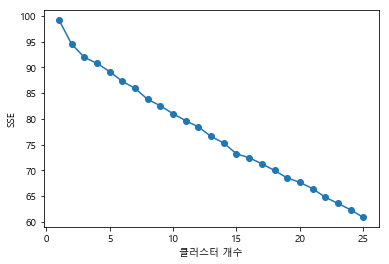

Top terms per cluster:
Cluster 0:
 ㄴ데
 하나님
 ㄴ가
 의롭
 우리
 모든
 여기
 세례
 영원
 예정
Cluster 1:
 그리스도
 께서
 우리
 구원
 직분
 에게
 행하
 어떻
 효력
 는가
Cluster 2:
 계명
 증진
 금하
 합리
 재물
 산업
 명예
 방해
 진실
 대로
Cluster 3:
 금하
 계명
 거나
 영화
 하나님
 아니하
 경배
 ㄴ가
 무엇
 제일
Cluster 4:
 우리
 기도
 주기도문
 구하
 하나님
 능히
 소서
 무엇
 에게
 나라
Cluster 5:
 안식일
 계명
 명하
 말씀
 특별히
 지키
 하나님
 여호와
 교훈
 만물
Cluster 6:
 께서
 사람
 섭리
 하나님
 본분
 요구
 창조
 예정
 이루
 어떻
Cluster 7:
 신자
 그리스도
 부활
 베풀
 유익
 에게서
 성례
 에게
 세례
 완전히
Cluster 8:
 계명
 마르
 ㄴ가
 무엇
 이웃
 간음
 살인
 도적
 이름
 높이
Cluster 9:
 타락
 지위
 창조
 인종
 에서
 시조
 비참
 으로
 모든
 범죄
Cluster 10:
 지키
 이유
 계명
 범하
 마다
 사람
 하나님
 보응
 자기
 에게
Cluster 11:
 에서
 유익
 하심
 여러
 금생
 가지
 거룩
 나오
 악하
 서문
Cluster 12:
 성찬
 참여
 신약
 성례
 주의
 순종
 어기
 부족
 합당
 이나


Prediction
[3]
[0]


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib
import matplotlib.pyplot as plt
 
FEATURE_POSES = ["NNG", "NNP", "NR", "NP", "XR", "MAG", "VA", "VV"]
MA_KEYS = ["question_ma", "answer_ma"]
TOP_N = 15


def read_documents(input_file):
    """형태소 분석 문서 집합을 읽어서 돌려준다."""
    
    print_log("Reading input file.")
    documents = []

    for line in input_file:
        json_obj = ujson.loads(line)

        if not check_ma_keys(json_obj):
            continue

        morphs = ""

        for ma_key in MA_KEYS:
            for sent_ma in json_obj[ma_key]:
                for morph_lex, morph_cat in sent_ma:
                    #if morph_cat not in FEATURE_POSES:
                    #    continue

                    morphs += " " + morph_lex
        documents.append(morphs.strip())

    return documents


def check_ma_keys(json_obj):
    """JSON 객체에 형태소 분석 키가 존재하는지 검사한다."""
    
    for ma_key in MA_KEYS:
        if ma_key not in json_obj or not json_obj[ma_key]:
            return False
        
    return True

def set_font():
    """차트의 글꼴을 설정한다."""
    
    if sys.platform in ["win32", "win64"]:
        font_name = "malgun gothic"
    elif sys.platform == "darwin":
        font_name = "AppleGothic"
        
    matplotlib.rc("font", family=font_name)
    
def elbow(X):
    sse = []
    for i in range(1,26):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
    
    set_font()    
    plt.plot(range(1,26), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    

input_file_name = "data/catechism/catechism.ma.txt"

with open(input_file_name, "r", encoding="utf-8") as input_file:
    documents = read_documents(input_file)
    #print(documents)

 
# TfidfVectorizer 인스턴스를 만들고 fit_transform 메소드를 실행하면 term-document matrix가 생성된다. 
#vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
print(X.shape)
elbow(X)

true_k = 13
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
 
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
 
 
print("\n")
print("Prediction")
 
Y = vectorizer.transform(["사람 의 제일 되는 목적 이 무엇 이 ㄴ가 ?"])
prediction = model.predict(Y)
print(prediction)
 
Y = vectorizer.transform(["하나님 은 어떤 분 이 시 ㄴ가 ?"])
prediction = model.predict(Y)
print(prediction)



Reading input file.
(107, 466)
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.22051607]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.16044277  0.         ...,  0.          0.          0.        ]]


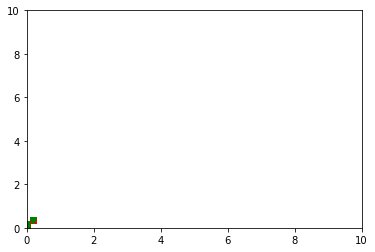

In [65]:
import collections
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


FEATURE_POSES = ["NNG", "NNP", "NR", "NP", "XR", "MAG", "VA", "VV"]
MA_KEYS = ["question_ma", "answer_ma"]
TOP_N = 15


def read_documents(input_file):
    """형태소 분석 문서 집합을 읽어서 돌려준다."""
    
    print_log("Reading input file.")
    documents = []

    for line in input_file:
        json_obj = ujson.loads(line)

        if not check_ma_keys(json_obj):
            continue

        morphs = ""

        for ma_key in MA_KEYS:
            for sent_ma in json_obj[ma_key]:
                for morph_lex, morph_cat in sent_ma:
                    if morph_cat not in FEATURE_POSES:
                        continue

                    morphs += " " + morph_lex
        documents.append(morphs.strip())

    return documents


def check_ma_keys(json_obj):
    """JSON 객체에 형태소 분석 키가 존재하는지 검사한다."""
    
    for ma_key in MA_KEYS:
        if ma_key not in json_obj or not json_obj[ma_key]:
            return False
        
    return True


input_file_name = "data/catechism/catechism.ma.txt"

with open(input_file_name, "r", encoding="utf-8") as input_file:
    documents = read_documents(input_file)
    #print(documents)

# TfidfVectorizer 인스턴스를 만들고 fit_transform 메소드를 실행하면 term-document matrix가 생성된다. 
#vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
print(X.shape)
 
# create new plot and data
plt.plot()
XX = X.toarray()
print(XX)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# KMeans algorithm 
K = 3
kmeans_model = KMeans(n_clusters=K).fit(XX)
 
plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(XX[:,0], XX[:,1], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
 
plt.show()
 